In [1]:
import pandas as pd
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def wrangle_with_dt(filepath):
    """
    Wrangle function takes an input of a filepath which contains a date-time,
    outputs a cleaned dataframe
    """

    df = pd.read_csv("C:/Users/SALAKO/dlib/omdena/omdena-texas-homelessness/src/cleaned data/prison_data.csv")
    
    # Seperates the categorical columns
    categorical_cols = df.select_dtypes('object').columns
    
    #Creates threshold for how many times you will allow the same value to show up in multiple columns in a row.
    threshold = 50
    
    #Identify high cardinality columns
    high_card_cols = [col for col in categorical_cols 
                      if df[col].nunique() > threshold]
    
    # Drop high cardinality columns
    df.drop(high_card_cols, axis=1, inplace=True)
    
    # Drop columns with a high number of NaN values
    if len(df) > 100:
        df = df.dropna(axis = 1, thresh = 100)
    # Fill NA values with front fill. Replaces with value ahead of it.
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
    
    # Clear punctuation/special characters from columns using regex
    punct_regex = r"[^0-9a-zA-Z\s]"
    special_char_regex = r'[\$\%\&\@+\"\'\,]'
    df.columns = df.columns.str.replace('[?]', '')
    df.columns = df.columns.str.replace(r'[/,\\]', ' ')
    
    # Lambda apply regex to df
    df = df.rename(columns = lambda x: 
        re.sub(punct_regex, "", x))
    df = df.rename(columns = lambda x:
        re.sub(special_char_regex, "", x))
    
    # Replace all spaces with an underscore for proper formatting
    df = df.rename(columns = lambda x:
        x.replace(" ", "_"))
    
    # Case normalize column names
    df.columns = df.columns.str.lower()
    
    return df


In [3]:
df = wrangle_with_dt('prison_data.csv')

In [4]:
df.head()

,unnamed_0,state,total_sex,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,138,Texas,Total,24575,26522,29892,31502,36149,35259,36682,...,171790,172506,171249,173649,172224,166372,168280,166043,163909,163703
1,139,Texas,Male,23570,25355,28671,30050,34472,33789,34987,...,157859,158653,157679,159298,158036,152823,154450,151717,149501,149368
2,140,Texas,Female,1005,1167,1221,1452,1677,1470,1695,...,13931,13853,13570,14351,14188,13549,13830,14326,14408,14335


In [5]:
df_tr=df.transpose()
print (df_tr)

                0       1       2
unnamed_0     138     139     140
state       Texas   Texas   Texas
total_sex   Total    Male  Female
1978        24575   23570    1005
1979        26522   25355    1167
1980        29892   28671    1221
1981        31502   30050    1452
1982        36149   34472    1677
1983        35259   33789    1470
1984        36682   34987    1695
1985        37532   35938    1594
1986        38534   36789    1745
1987        38821   37279    1542
1988        40437   38789    1648
1989        44022   41953    2069
1990        50042   47846    2196
1991        51677   49186    2491
1992        60467   58056    2411
1993        92013   85064    6949
1994       118195  109356    8839
1995       127766  119831    7935
1996       132383  122450    9933
1997       140351  130051   10300
1998       144510  134178   10332
1999       163190  150688   12502
2000       166719  153097   13622
2001       162070  149701   12369
2002       162003  148952   13051
2003       166

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   unnamed_0  3 non-null      int64 
 1   state      3 non-null      object
 2   total_sex  3 non-null      object
 3   1978       3 non-null      int64 
 4   1979       3 non-null      int64 
 5   1980       3 non-null      int64 
 6   1981       3 non-null      int64 
 7   1982       3 non-null      int64 
 8   1983       3 non-null      int64 
 9   1984       3 non-null      int64 
 10  1985       3 non-null      int64 
 11  1986       3 non-null      int64 
 12  1987       3 non-null      int64 
 13  1988       3 non-null      int64 
 14  1989       3 non-null      int64 
 15  1990       3 non-null      int64 
 16  1991       3 non-null      int64 
 17  1992       3 non-null      int64 
 18  1993       3 non-null      int64 
 19  1994       3 non-null      int64 
 20  1995       3 non-null      int64 
 2

In [7]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, unnamed_0 to 2016
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       42 non-null     object
 1   1       42 non-null     object
 2   2       42 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


In [8]:
df.nunique()

unnamed_0    3
state        1
total_sex    3
1978         3
1979         3
1980         3
1981         3
1982         3
1983         3
1984         3
1985         3
1986         3
1987         3
1988         3
1989         3
1990         3
1991         3
1992         3
1993         3
1994         3
1995         3
1996         3
1997         3
1998         3
1999         3
2000         3
2001         3
2002         3
2003         3
2004         3
2005         3
2006         3
2007         3
2008         3
2009         3
2010         3
2011         3
2012         3
2013         3
2014         3
2015         3
2016         3
dtype: int64

In [9]:
df_tr.nunique()

0    42
1    42
2    42
dtype: int64

<AxesSubplot:>

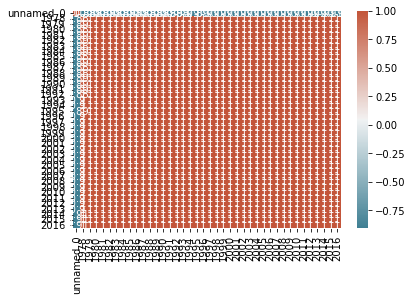

In [10]:
# Create a correlation matrix
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [11]:
## set up the visualization 
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(9,5)
plt.rcParams['figure.facecolor']='#00000000'

In [12]:
## Interactive visualization

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default='plotly_dark'

In [13]:
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()                 


In [14]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()




In [15]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")

In [16]:
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
    plt.show()

In [17]:
def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

In [18]:
# EDA of categorical data
categorical_eda(df)


To check: 
Unique count of non-numeric data

state        1
total_sex    3
dtype: int64
Top 5 unique values of state
   state  Count
0  Texas      3
 
Top 5 unique values of total_sex
  total_sex  Count
0     Total      1
1      Male      1
2    Female      1
 



To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
unnamed_0,3.0,139.000000,1.000000,138.0,138.5,139.0,139.5,140.0
1978,3.0,16383.333333,13327.503830,1005.0,12287.5,23570.0,24072.5,24575.0
1979,3.0,17681.333333,14313.730343,1167.0,13261.0,25355.0,25938.5,26522.0
1980,3.0,19928.000000,16212.236027,1221.0,14946.0,28671.0,29281.5,29892.0
1981,3.0,21001.333333,16945.778275,1452.0,15751.0,30050.0,30776.0,31502.0
1982,3.0,24099.333333,19436.405438,1677.0,18074.5,34472.0,35310.5,36149.0
1983,3.0,23506.000000,19097.884621,1470.0,17629.5,33789.0,34524.0,35259.0
1984,3.0,24454.666667,19728.661291,1695.0,18341.0,34987.0,35834.5,36682.0
1985,3.0,25021.333333,20304.314057,1594.0,18766.0,35938.0,36735.0,37532.0
1986,3.0,25689.333333,20754.748380,1745.0,19267.0,36789.0,37661.5,38534.0


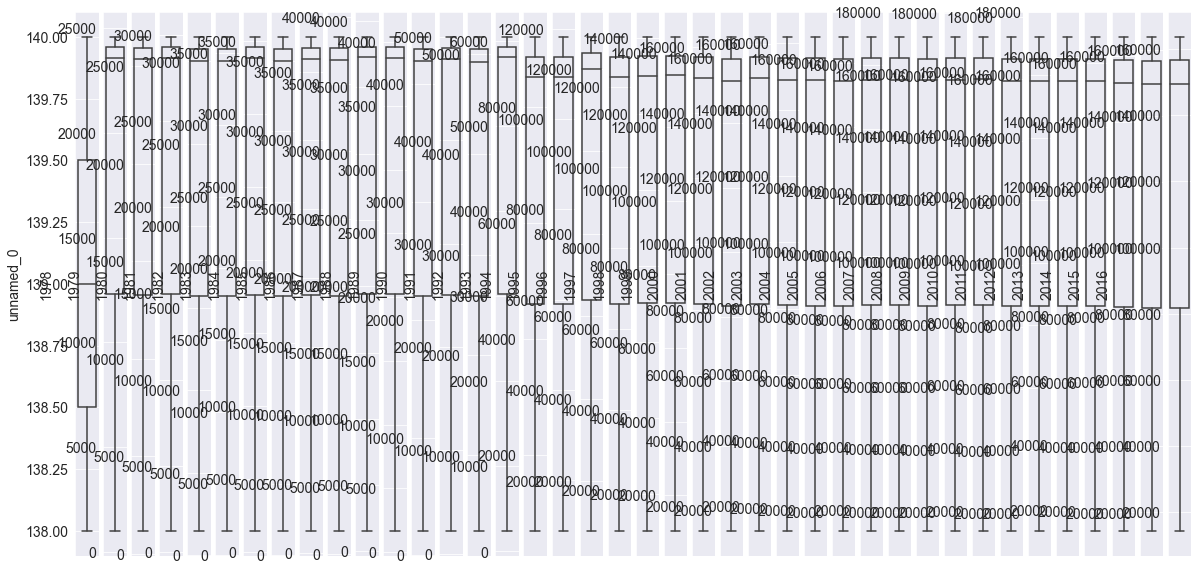


To check pairwise joint distribution of numeric data


In [ ]:
numeric_eda(df)

In [ ]:
time_series_plot(df)